In [342]:
# Import libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pickle

In [343]:
# Load dataset
data = pd.read_csv('segmentation-data.csv')

In [344]:
data = data[['Age','Income','Education']]
data.head(20)

,Age,Income,Education
0,67,124670,2
1,22,150773,1
2,49,89210,1
3,45,171565,1
4,53,149031,1
5,35,144848,1
6,53,156495,1
7,35,193621,1
8,61,151591,2
9,28,174646,1


In [345]:
# Normalisasi data
# Akan menghasilkan nilai baru hasil normalisasi antara 0 sampai 1
data["Age"] = (data["Age"] - data["Age"].min()) / (data["Age"].max() - data["Age"].min())
data["Income"] = (data["Income"] - data["Income"].min()) / (data["Income"].max() - data["Income"].min())
data["Education"] = (data["Education"] - data["Education"].min()) / (data["Education"].max() - data["Education"].min())
data.head(20)

,Age,Income,Education
0,0.844828,0.324781,0.666667
1,0.068966,0.420210,0.333333
2,0.534483,0.195144,0.333333
3,0.465517,0.496223,0.333333
4,0.603448,0.413842,0.333333
5,0.293103,0.398549,0.333333
6,0.603448,0.441129,0.333333
7,0.293103,0.576858,0.333333
8,0.741379,0.423201,0.666667
9,0.172414,0.507487,0.333333


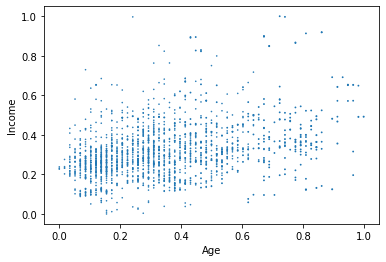

In [346]:
f1 = data['Age'].values
f2 = data['Income'].values
f3 = data['Education'].values

X = np.array(list(zip(f1, f2, f3)))

# Visualisasi data point
plt.scatter(f1, f2, f3)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [347]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi Method
encoder = LabelEncoder()

# Looping
for c in data.columns[0:]:  
    if(data[c].dtype=='object'): # if column type = object
        data[c] = encoder.fit_transform(data[c])
    else: # else get the self column value without encode
        data[c] = data[c]

In [348]:
# Menentukan nilai yang tepat untuk cluster
X = np.array(list(zip(f1, f2, f3))).reshape(len(f1), 3)

# print(X)
SSE = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k).fit(X)
  kmeanModel.fit(X)
  SSE.append(kmeanModel.inertia_)

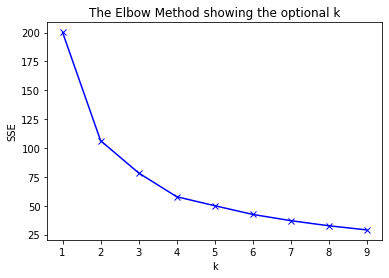

In [349]:
# Plot nilai K untuk mencari elbow
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optional k')
plt.show()

In [350]:
# Melakukan clustering
from sklearn.cluster import KMeans

# Menentukan jumlah cluster
kmeans = KMeans(n_clusters=3)

# Fitting input data
kmeans = kmeans.fit(X)

# Mendapatkan cluster labels
labels = kmeans.predict(X)

# Mendapatkan nilai centroid
C = kmeans.cluster_centers_
y_kmeans = kmeans.fit_predict(X)

# Mencetak nilai centroid
print(C)

[[1.62201129e-01 2.89678036e-01 7.21644966e-16]
 [6.21377476e-01 4.07141305e-01 6.55141844e-01]
 [2.52327651e-01 2.88834605e-01 3.33333333e-01]]


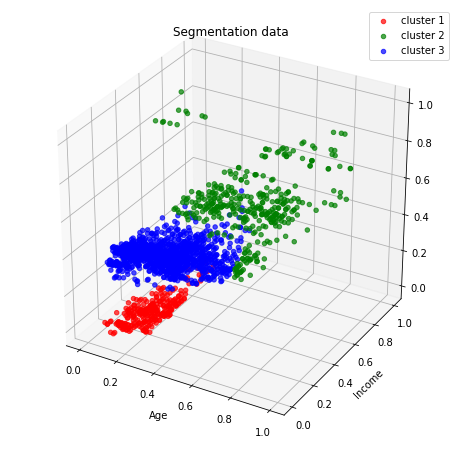

In [351]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[y_kmeans == 0]['Age'], data[y_kmeans == 0]['Income'], data[y_kmeans == 0]['Education'], linewidths=1, alpha=.7, s = 20, c='red', label='cluster 1')
ax.scatter(data[y_kmeans == 1]['Age'], data[y_kmeans == 1]['Income'], data[y_kmeans == 1]['Education'], linewidths=1, alpha=.7, s = 20, c='green', label='cluster 2')
ax.scatter(data[y_kmeans == 2]['Age'], data[y_kmeans == 2]['Income'], data[y_kmeans == 2]['Education'], linewidths=1, alpha=.7, s = 20, c='blue', label='cluster 3')
plt.title('Segmentation data')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [352]:
data['Cluster'] = y_kmeans

In [353]:
data.head(20)

,Age,Income,Education,Cluster
0,0.844828,0.324781,0.666667,1
1,0.068966,0.420210,0.333333,2
2,0.534483,0.195144,0.333333,2
3,0.465517,0.496223,0.333333,2
4,0.603448,0.413842,0.333333,1
5,0.293103,0.398549,0.333333,2
6,0.603448,0.441129,0.333333,1
7,0.293103,0.576858,0.333333,2
8,0.741379,0.423201,0.666667,1
9,0.172414,0.507487,0.333333,2


In [354]:
pickle.dump(kmeans, open('model.pkl', 'wb'))